# 1.Import necessary libraries

In [534]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

import warnings
warnings.filterwarnings('ignore')

# 2.Read data

In [498]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# 3.Data preprocessing

In [499]:
df.shape

(7043, 21)

In [500]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


'tenure' column has 0 values which is not acceptable so we will drop it

In [501]:
df[df.tenure == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [502]:
df.drop(labels=df[df.tenure == 0]. index, axis=0, inplace=True)
df[df.tenure == 0].index

Index([], dtype='int64')

In [503]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [504]:
for col in df.columns.values:
    print(f'Col "{col}" has {df[col].nunique()}')

Col "customerID" has 7032
Col "gender" has 2
Col "SeniorCitizen" has 2
Col "Partner" has 2
Col "Dependents" has 2
Col "tenure" has 72
Col "PhoneService" has 2
Col "MultipleLines" has 3
Col "InternetService" has 3
Col "OnlineSecurity" has 3
Col "OnlineBackup" has 3
Col "DeviceProtection" has 3
Col "TechSupport" has 3
Col "StreamingTV" has 3
Col "StreamingMovies" has 3
Col "Contract" has 3
Col "PaperlessBilling" has 2
Col "PaymentMethod" has 4
Col "MonthlyCharges" has 1584
Col "TotalCharges" has 6530
Col "Churn" has 2


As we see 'TotalCharges' column is object type but it includes numerical values.

In [505]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [506]:
df.fillna(df['TotalCharges'].mean())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [507]:
df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 4. Data visualization

In [508]:

gender = df.gender.value_counts()
churn = df.Churn.value_counts()
gender_churn = df.groupby(['gender', 'Churn']).size().unstack().fillna(0)


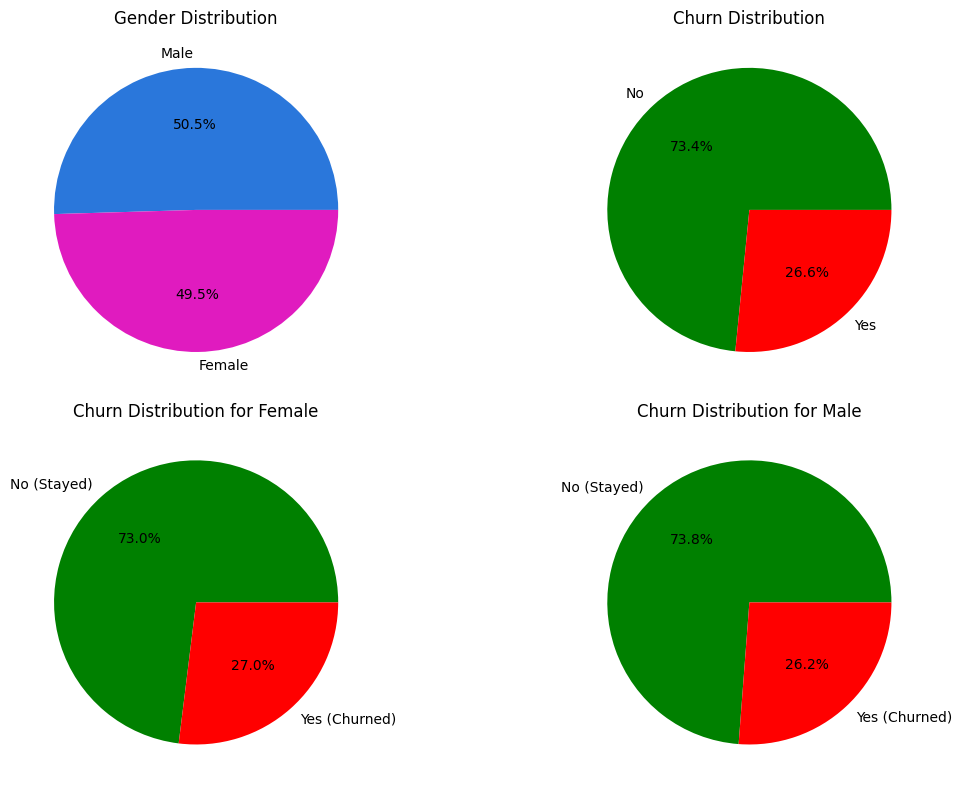

In [509]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0][0].pie(gender, labels=gender.index, colors=['#2a77db', '#e01bbf'], autopct='%1.1f%%')
axes[0][0].set_title('Gender Distribution')

axes[0][1].pie(churn, labels=churn.index, colors=['green', 'red'], autopct='%1.1f%%')
axes[0][1].set_title('Churn Distribution')

for i, gender_type in enumerate(gender_churn.index):
    axes[1][i].pie(gender_churn.loc[gender_type], labels=["No (Stayed)", "Yes (Churned)"], autopct='%1.1f%%', colors=["green", "red"])
    axes[1][i].set_title(f"Churn Distribution for {gender_type.capitalize()}")


plt.tight_layout()
plt.show()

Both genders have the same probability of churning

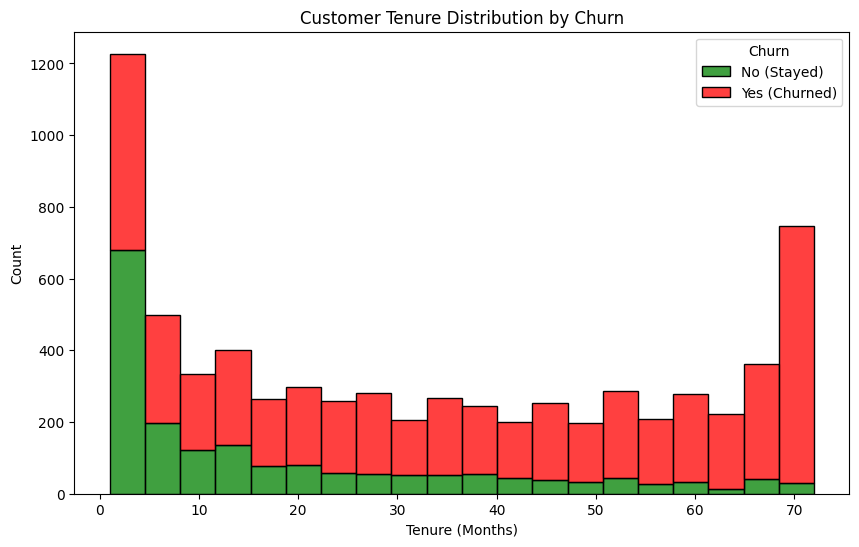

In [510]:
plt.figure(figsize=(10, 6))

sns.histplot(df, x="tenure", hue="Churn", bins=20, palette=["red", "green"], multiple="stack")

plt.title("Customer Tenure Distribution by Churn")
plt.xlabel("Tenure (Months)")
plt.ylabel("Count")
plt.legend(title="Churn", labels=["No (Stayed)", "Yes (Churned)"])

plt.show()

New customers are more likely to churn than existing customers

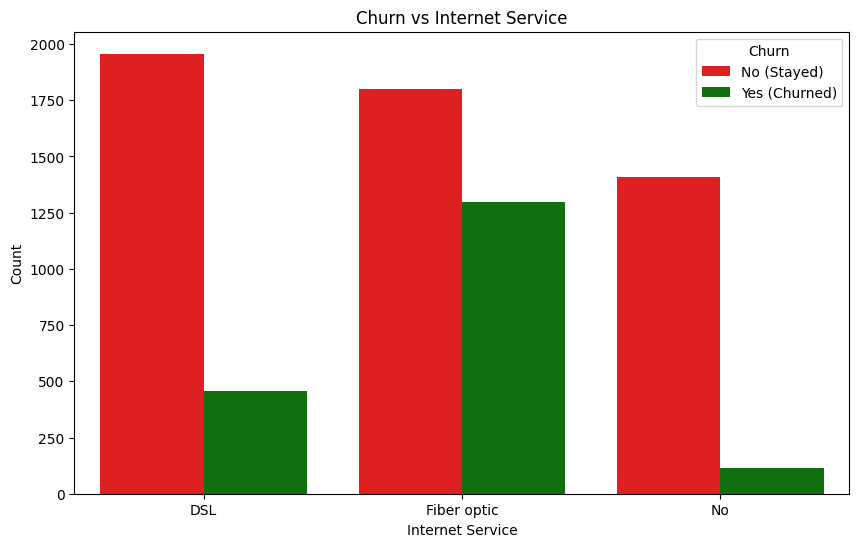

In [511]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='InternetService', hue='Churn', palette=["red", "green"])

plt.title('Churn vs Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.legend( loc='upper right', title="Churn", labels=["No (Stayed)", "Yes (Churned)"])

plt.show()

Most of customers that use Fiber optic service, which shows a higher churn rate, suggesting potential dissatisfaction. In contrast, DSL customers, who are the majority, experience a lower churn rate.

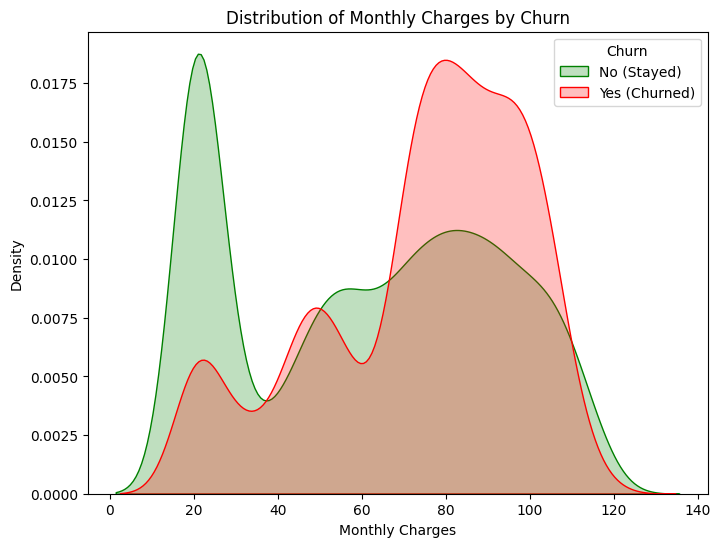

In [512]:
plt.figure(figsize=(8, 6))
ax = sns.kdeplot(df.MonthlyCharges[df["Churn"] == 'No'], color="green", shade=True)
sns.kdeplot(df.MonthlyCharges[df["Churn"] == 'Yes'], ax=ax, color="red", shade=True)

ax.legend( loc='upper right', title="Churn", labels=["No (Stayed)", "Yes (Churned)"])
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of Monthly Charges by Churn')

plt.show()

Customers that have higher Monthly Charges has more chance to churn

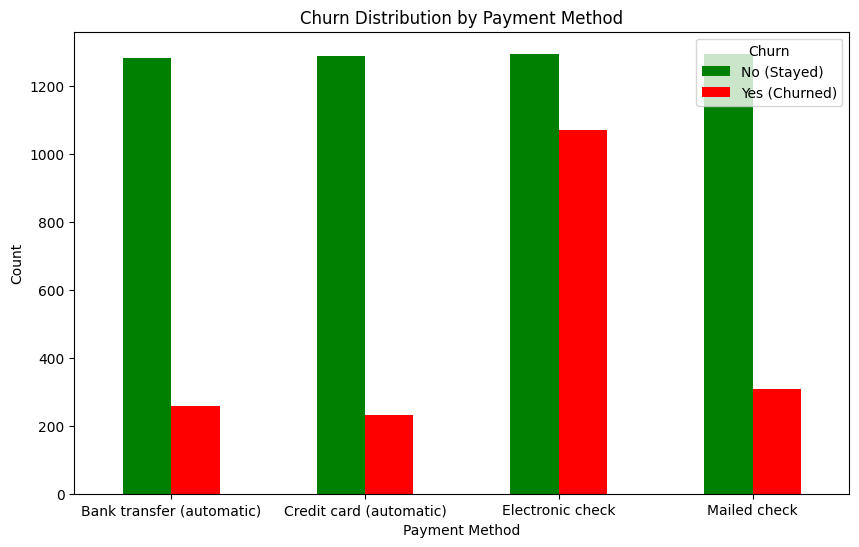

In [513]:
payment_churn = df.groupby(['PaymentMethod', 'Churn']).size().unstack().fillna(0)

payment_churn.plot(kind='bar', color=["green", "red"], figsize=(10, 6))

plt.title("Churn Distribution by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title="Churn", labels=["No (Stayed)", "Yes (Churned)"])

plt.show()

The majority of customers who left were using Electronic Check as their payment method. In contrast, those using Credit-Card automatic transfer, Bank Automatic Transfer, or Mailed Check were less likely to churn.

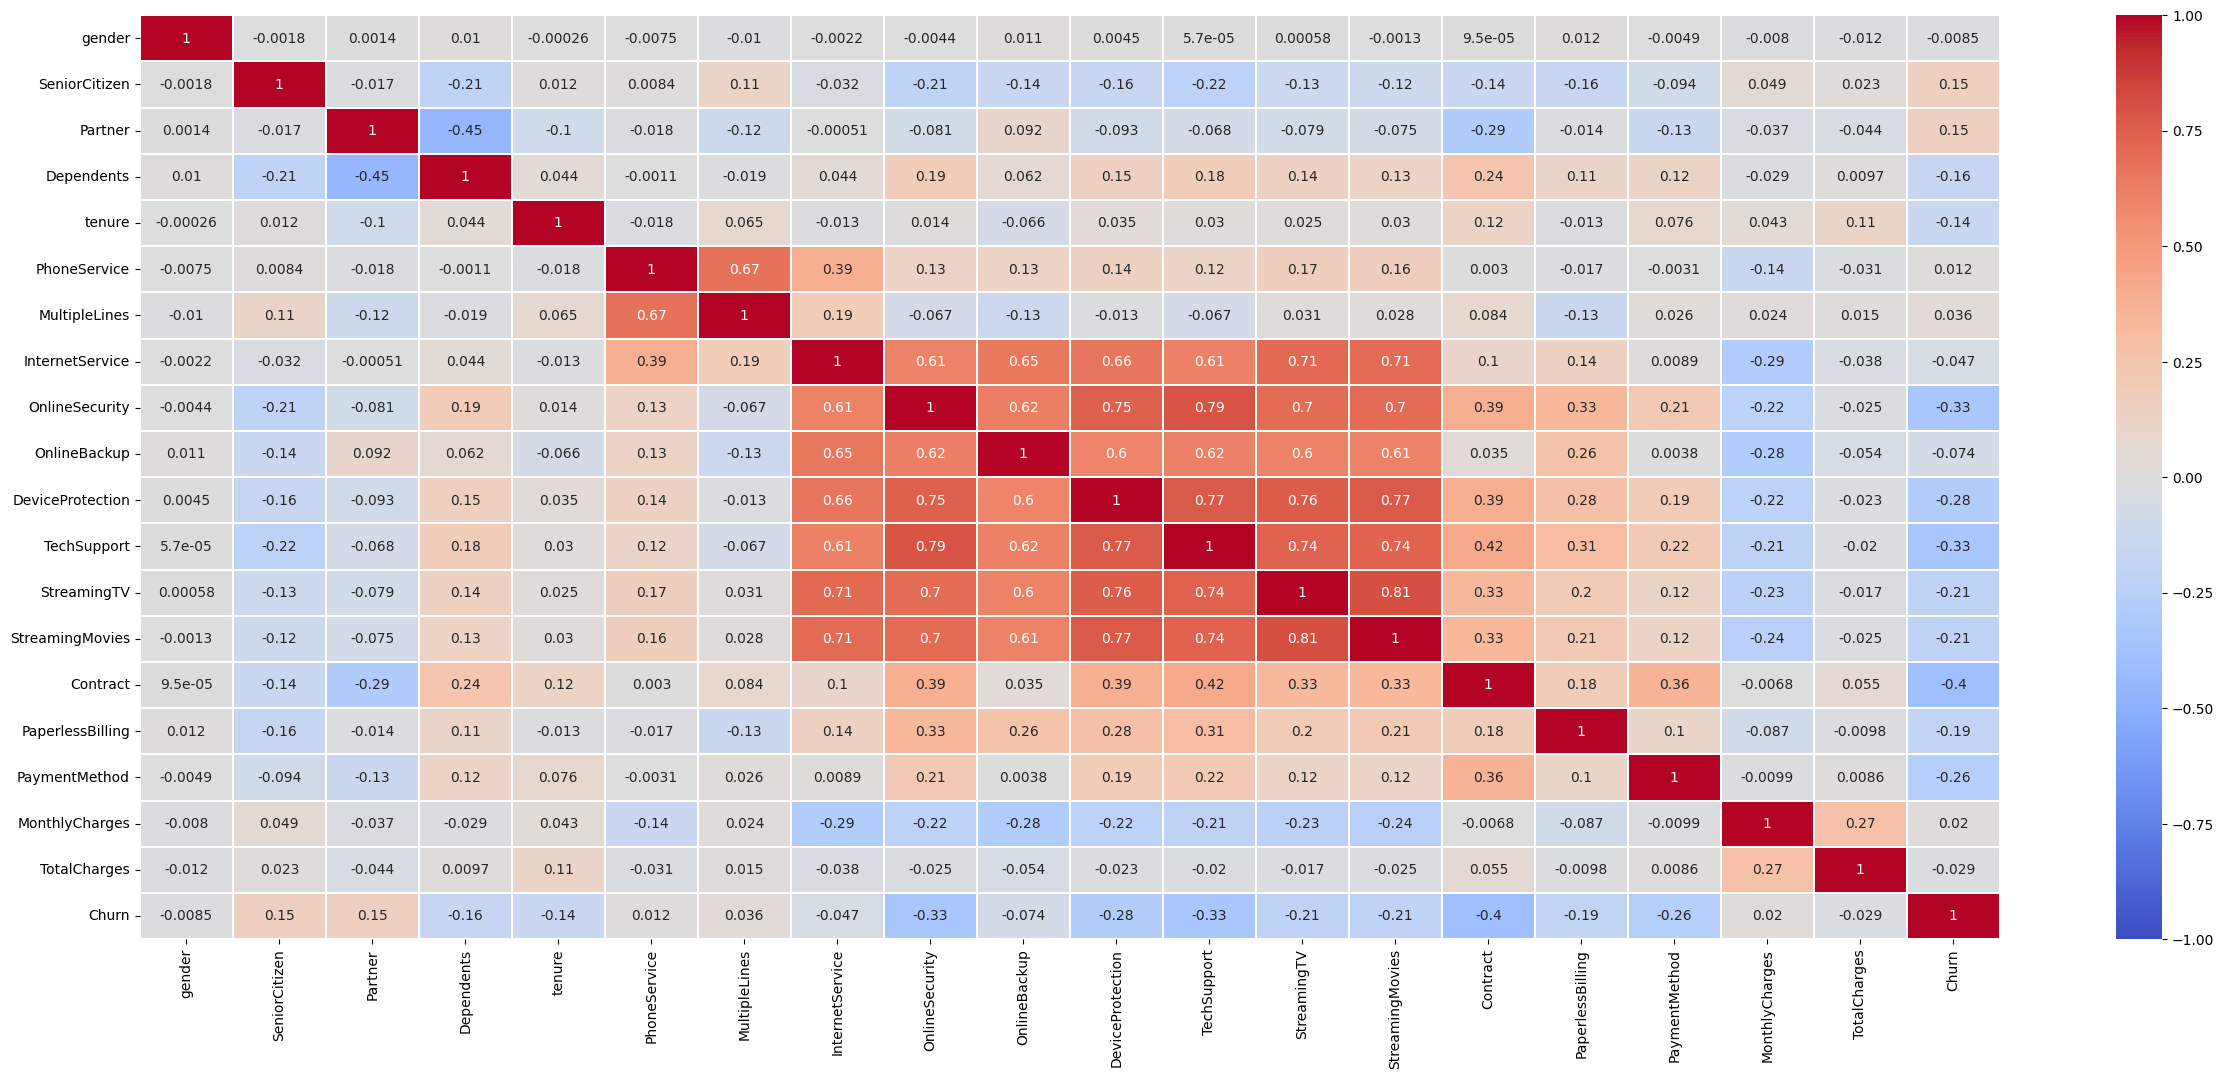

In [514]:
plt.figure(figsize=(30, 12))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, 
                    linewidths=.1, cmap='coolwarm', vmin=-1, vmax=1)

In [515]:
corr.sort_values(by="Churn", ascending=False)['Churn']

Churn               1.000000
SeniorCitizen       0.150541
Partner             0.149982
MultipleLines       0.036148
MonthlyCharges      0.020303
PhoneService        0.011691
gender             -0.008545
TotalCharges       -0.028994
InternetService    -0.047097
OnlineBackup       -0.073934
tenure             -0.143101
Dependents         -0.163128
PaperlessBilling   -0.191454
StreamingTV        -0.205246
StreamingMovies    -0.207150
PaymentMethod      -0.262918
DeviceProtection   -0.281048
TechSupport        -0.329474
OnlineSecurity     -0.332443
Contract           -0.396150
Name: Churn, dtype: float64

In [516]:
df.drop(columns=['gender', 'PhoneService'], inplace=True)
df.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,No,No,34,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,0,No,No,2,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,No,No,45,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,No,No,2,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [517]:
df.shape

(7032, 18)

In [518]:
numCols = df.select_dtypes(include=['number']).drop(columns=['SeniorCitizen']).columns
numCols

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [519]:
catCols = df.select_dtypes(include=['object']).drop(columns=['Churn']).columns
catCols

Index(['Partner', 'Dependents', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod'],
      dtype='object')

In [520]:
x = df.drop(columns=['Churn'])
y = df['Churn']

In [521]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

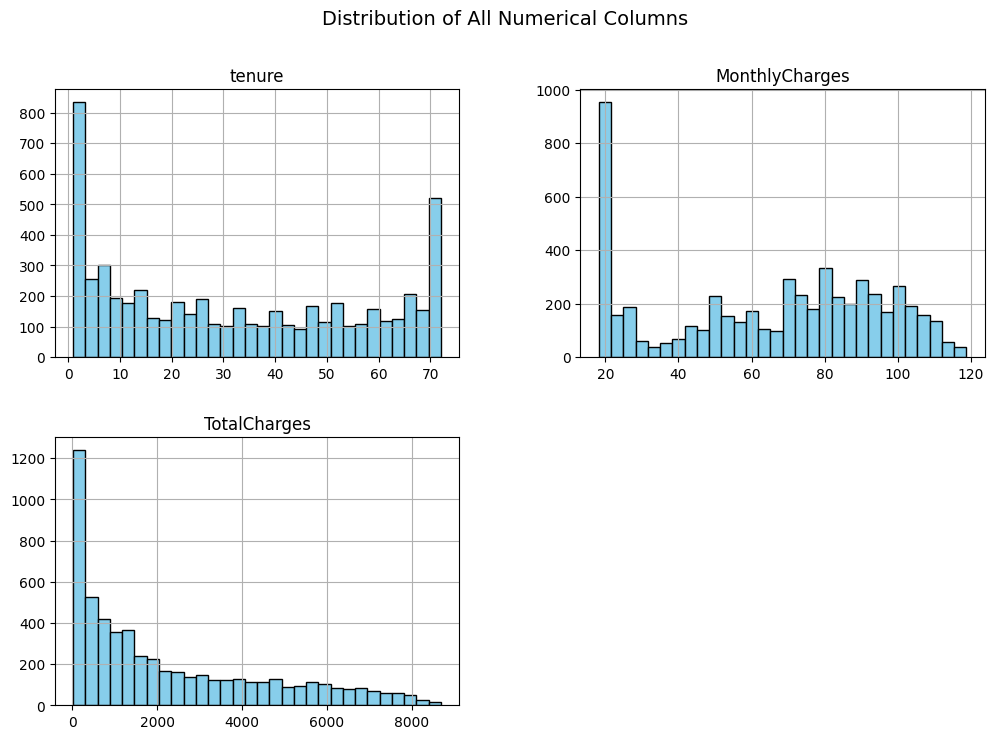

In [522]:
x_train[numCols].hist(figsize=(12, 8), bins=30, color='skyblue', edgecolor='black')
plt.suptitle("Distribution of All Numerical Columns", fontsize=14)
plt.show()

In [523]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numCols),
    ('cat', OneHotEncoder(), catCols)
])

## LogisticRegression

In [524]:
model_pipeline = Pipeline([
        ('preprocessing', preprocessor),
        ('classifier', LogisticRegression())
    ])
    
model_pipeline.fit(x_train, y_train)
y_pred = model_pipeline.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

In [525]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.84      0.89      0.86      1033
         Yes       0.62      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



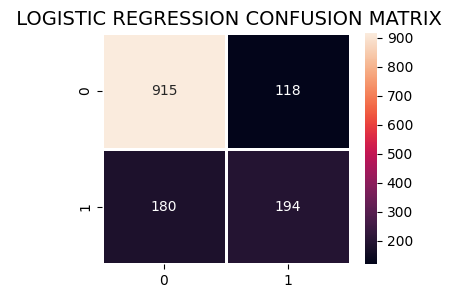

In [526]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True ,fmt = "d",linewidths=2)
    
plt.title(" LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

In [535]:
joblib.dump(model_pipeline, 'log_reg.pkl')

['log_reg.pkl']

## Support Vector Machines (SVC)

In [527]:
model_pipeline = Pipeline([
        ('preprocessing', preprocessor),
        ('classifier', SVC())
    ])
    
model_pipeline.fit(x_train, y_train)
y_pred = model_pipeline.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

In [528]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.82      0.90      0.86      1033
         Yes       0.64      0.47      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407



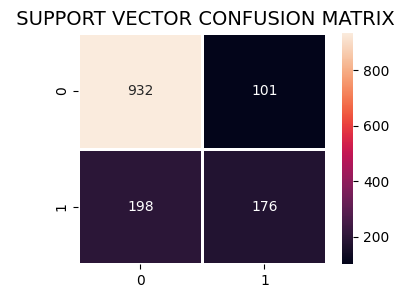

In [529]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True ,fmt = "d",linewidths=2)
    
plt.title(" SUPPORT VECTOR CONFUSION MATRIX",fontsize=14)
plt.show()

In [ ]:
joblib.dump(model_pipeline, 'svc.pkl')

## Random Forest

In [530]:
model_pipeline = Pipeline([
        ('preprocessing', preprocessor),
        ('classifier', RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                    random_state =50,
                                    max_leaf_nodes = 30))
    ])
    
model_pipeline.fit(x_train, y_train)
y_pred = model_pipeline.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

In [531]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.82      0.91      0.86      1033
         Yes       0.64      0.46      0.53       374

    accuracy                           0.79      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.77      0.79      0.77      1407



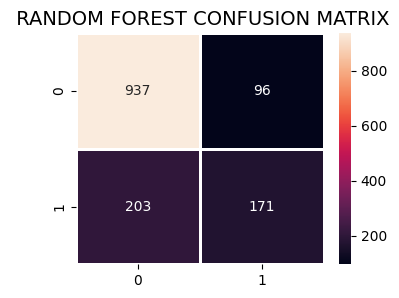

In [532]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True ,fmt = "d",linewidths=2)
    
plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

In [ ]:
joblib.dump(model_pipeline, 'random_forest.pkl')